# Baseline models 

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import warnings
# warnings are not shown anymore
warnings.filterwarnings("ignore")

# use jupyter magic
%matplotlib inline

In [2]:
# set the size of all figures in this notebook
plt.rcParams["figure.figsize"] = (9,6)

## Read the data 

In [3]:
# source: https://raw.githubusercontent.com/plotly/datasets/master/monthly-milk-production-pounds.csv
df = pd.read_csv("data/monthly-milk-production-pounds.csv")

df.head()


,Month,Monthly milk production (pounds per cow)
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


Rename the columns to make it easier: 

In [4]:
df.columns = ["Month", "Milk"]
df.head()

,Month,Milk
0,1962-01,589
1,1962-02,561
2,1962-03,640
3,1962-04,656
4,1962-05,727


In [5]:
np.arange(0, 179, 12)

array([  0,  12,  24,  36,  48,  60,  72,  84,  96, 108, 120, 132, 144,
       156, 168])

In [6]:
np.arange(1962, 1977, 1)

array([1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972,
       1973, 1974, 1975, 1976])

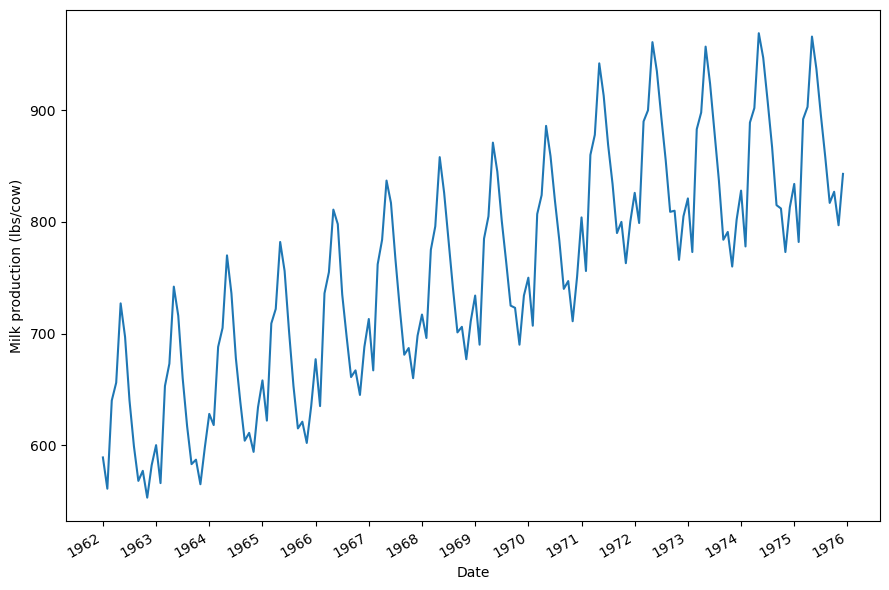

In [7]:
# use this way even if you have only 1 plot - it is more flexible if I want to add plots later on
fig, ax = plt.subplots()

# x, y
ax.plot(df["Month"], df["Milk"])
ax.set_xlabel("Date")
ax.set_ylabel("Milk production (lbs/cow)")

# ticks, labels
# every twelf month to show the year
plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))

fig.autofmt_xdate()
plt.tight_layout();

## Train/test split 

Draw a little Rectangle to show the test area

In [8]:
df.tail()

,Month,Milk
163,1975-08,858
164,1975-09,817
165,1975-10,827
166,1975-11,797
167,1975-12,843


! Achtung Confusion: ich habe nur 14 volle Jahre aber 15 Label damit ich am Ende noch 1976 schreiben kann!
Aber eigentlich geht mein DataFrame nur bis 167 und nicht bis 179

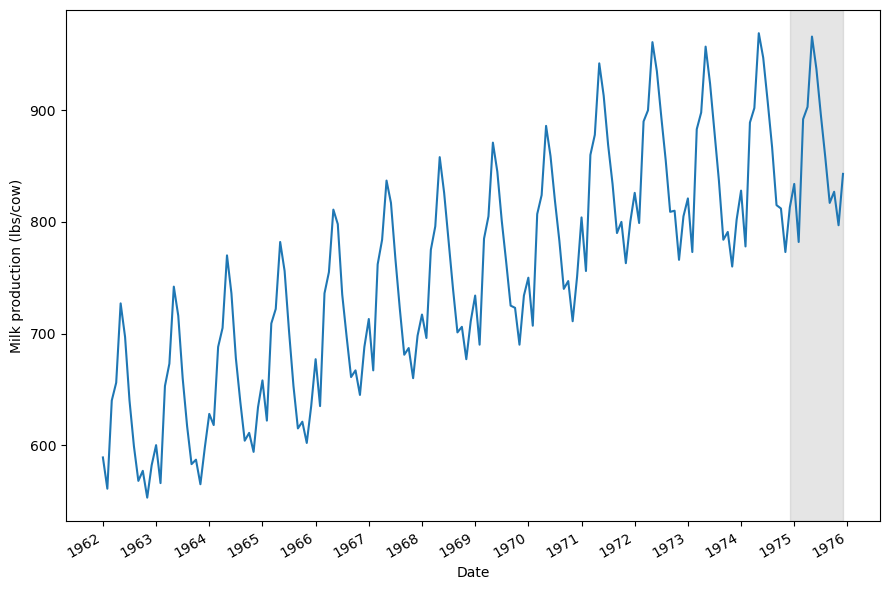

In [9]:
fig, ax = plt.subplots()

# x, y
ax.plot(df["Month"], df["Milk"])
ax.set_xlabel("Date")
ax.set_ylabel("Milk production (lbs/cow)")

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
# we are interested in the last twelve data points
ax.axvspan(155, 167, color="#808080", alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

In [10]:
train = df[:-12]
test = df[-12:] # last twelve

## Baseline 1: Predict the mean 

In [11]:
pred_df = test.copy()
# is the same - but which is faster??
# pred_df["mean"] = train["Milk"].mean()
pred_df["mean"] = np.mean(train["Milk"]).round(2)
pred_df.head()

,Month,Milk,mean
156,1975-01,834,746.4
157,1975-02,782,746.4
158,1975-03,892,746.4
159,1975-04,903,746.4
160,1975-05,966,746.4


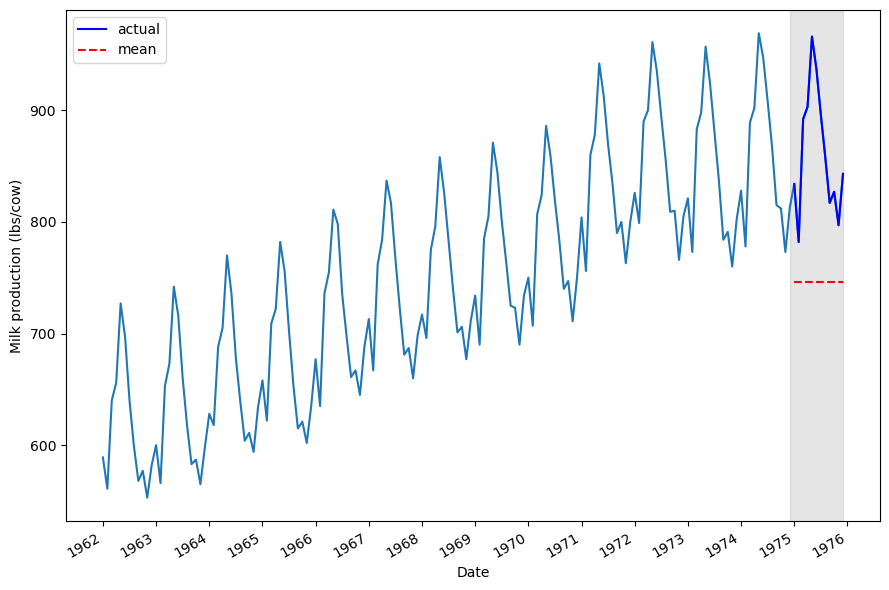

In [12]:
fig, ax = plt.subplots()

# x, y
ax.plot(df["Month"], df["Milk"])
ax.plot(pred_df["Month"], pred_df["Milk"], "b-", label="actual")

#? hie brauche ich gar kein x Wert mehr?
ax.plot(pred_df["mean"], "r--", label="mean")
ax.set_xlabel("Date")
ax.set_ylabel("Milk production (lbs/cow)")
ax.legend(loc="best")

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
# we are interested in the last twelve data points
ax.axvspan(155, 167, color="#808080", alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

## Baseline 2: Predict last year's mean

In [13]:
import datetime as dt

pred_df["mean_last_year"] = train[pd.to_datetime(train["Month"]).dt.year == 1974][
    "Milk"
].mean()

pred_df.head()

,Month,Milk,mean,mean_last_year
156,1975-01,834,746.4,858.416667
157,1975-02,782,746.4,858.416667
158,1975-03,892,746.4,858.416667
159,1975-04,903,746.4,858.416667
160,1975-05,966,746.4,858.416667


In [14]:
# leichter:
pred_df["mean_last_year"] = np.mean(train["Milk"][-12:])
pred_df.head() 

,Month,Milk,mean,mean_last_year
156,1975-01,834,746.4,858.416667
157,1975-02,782,746.4,858.416667
158,1975-03,892,746.4,858.416667
159,1975-04,903,746.4,858.416667
160,1975-05,966,746.4,858.416667


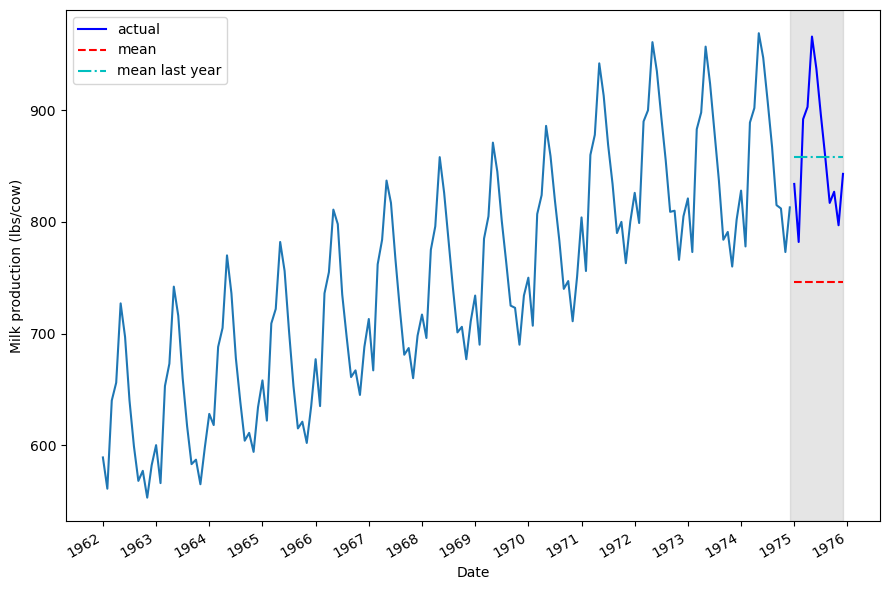

In [15]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Milk'])
ax.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
ax.plot(pred_df['mean'], 'r--', label='mean')
# Plot the predictions of last year's mean
ax.plot(pred_df["mean_last_year"], 'c-.', label="mean last year")

ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')
ax.legend(loc='best')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155, 167, color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

## Baseline 3: Predict the last known value 

In [16]:
train.tail()

,Month,Milk
151,1974-08,867
152,1974-09,815
153,1974-10,812
154,1974-11,773
155,1974-12,813


In [17]:
pred_df["last"] = train["Milk"].iloc[-1]
pred_df.head()

,Month,Milk,mean,mean_last_year,last
156,1975-01,834,746.4,858.416667,813
157,1975-02,782,746.4,858.416667,813
158,1975-03,892,746.4,858.416667,813
159,1975-04,903,746.4,858.416667,813
160,1975-05,966,746.4,858.416667,813


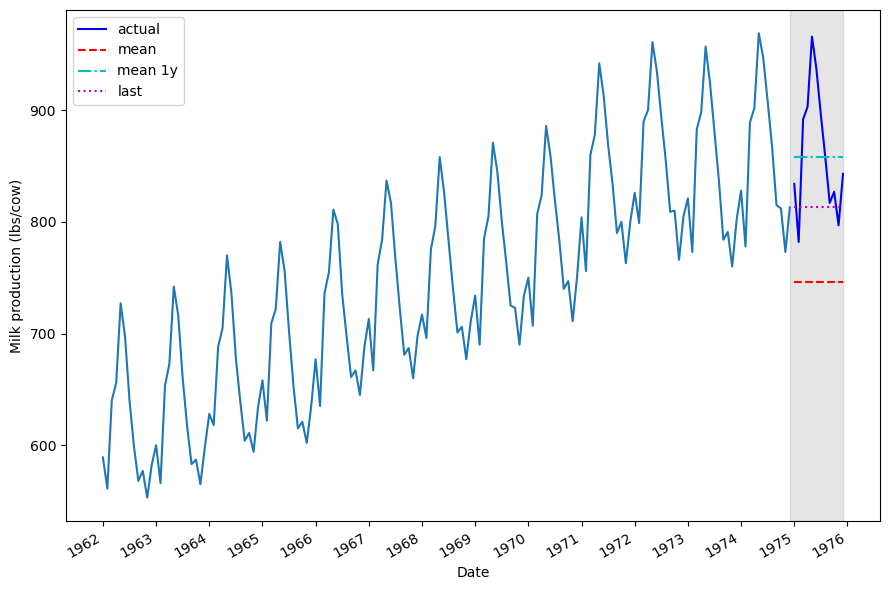

In [18]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Milk'])
ax.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
ax.plot(pred_df['mean'], 'r--', label='mean')
ax.plot(pred_df['mean_last_year'], 'c-.', label='mean 1y')
# Plot the prediction of the last known value
ax.plot(pred_df["last"], "m:" ,label="last")

ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')
ax.legend(loc='best')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155, 167, color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

## Predict the last season 

we have seasonal data - so this should be the best one

In [19]:
# ! we need to extract the values! then it is repeated
pred_df["last_season"] = train["Milk"].iloc[-12:].values
pred_df.head()

,Month,Milk,mean,mean_last_year,last,last_season
156,1975-01,834,746.4,858.416667,813,828
157,1975-02,782,746.4,858.416667,813,778
158,1975-03,892,746.4,858.416667,813,889
159,1975-04,903,746.4,858.416667,813,902
160,1975-05,966,746.4,858.416667,813,969


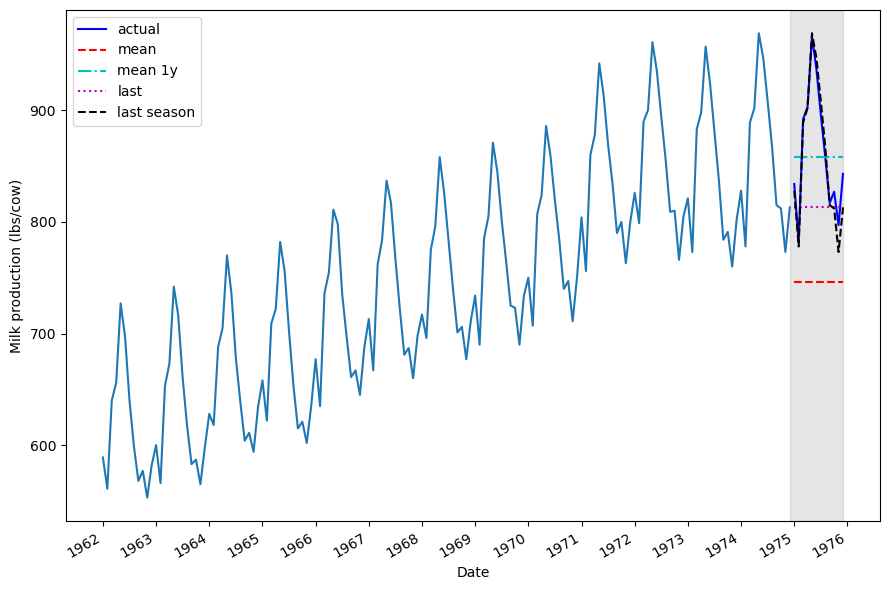

In [20]:
fig, ax = plt.subplots()

ax.plot(train['Month'], train['Milk'])
ax.plot(pred_df['Month'], pred_df['Milk'], 'b-', label='actual')
ax.plot(pred_df['mean'], 'r--', label='mean')
ax.plot(pred_df['mean_last_year'], 'c-.', label='mean 1y')
ax.plot(pred_df['last'], 'm:', label='last')
# Plot the predictions of the last season
ax.plot(pred_df["last_season"], "k--", label="last season")

ax.set_xlabel('Date')
ax.set_ylabel('Milk production (lbs/cow)')
ax.legend(loc='best')

plt.xticks(np.arange(0, 179, 12), np.arange(1962, 1977, 1))
ax.axvspan(155, 167, color='#808080', alpha=0.2)

fig.autofmt_xdate()
plt.tight_layout()

The black line nearly overlaps the data - is clearly the best baseline here!

## Evaluation 

In [24]:
# mean absolute percentage error
def mape(y_true, y_pred):
    return np.round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)

In [25]:
mape_mean = mape(pred_df["Milk"], pred_df["mean"])
mape_mean_1y = mape(pred_df["Milk"], pred_df["mean_last_year"])
mape_last = mape(pred_df["Milk"], pred_df["last"])
mape_last_season = mape(pred_df["Milk"], pred_df["last_season"])

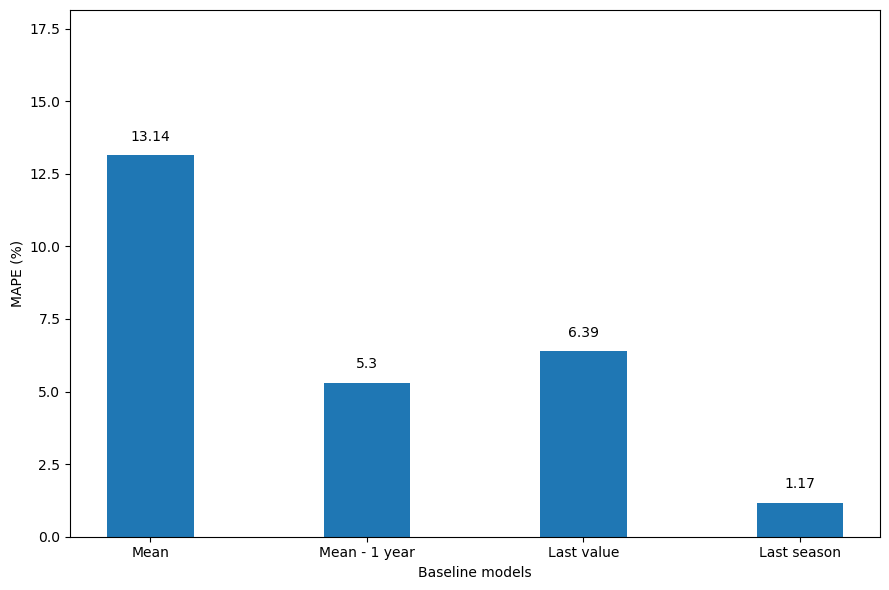

In [31]:
fig, ax = plt.subplots()

# label
x = ["Mean", "Mean - 1 year", "Last value", "Last season"]
# values
y = [mape_mean, mape_mean_1y, mape_last, mape_last_season]

ax.bar(x, y, width=0.4)

ax.set_xlabel("Baseline models")
ax.set_ylabel("MAPE (%)")
# just so the plot looks prettier
ax.set_ylim(0, max(y) + 5)

for index, value in enumerate (y):
    #print(index): 0, 1, 2, 3
    # x, y sind die Positionen - deshalb y + 0.5 damit es etwas weiter oben steht
    plt.text(x=index, y=value + 0.5, s =str(value), ha="center")

plt.tight_layout()